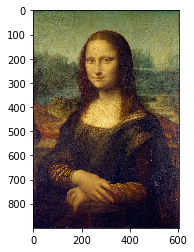

In [42]:
from PIL import Image
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

myImage = Image.open("604px-Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg");
w, h = myImage.size
myImage2array = np.asarray(myImage)
plt.imshow(myImage2array)
plt.show()

image_coord=[]
for i in range(h):
    for j in range (w):
        image_coord.append((i,j))

Mona_lisa = mpimg.imread("604px-Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg");
color_r = [Mona_lisa[x[0]][x[1]][0]/256 for x in image_coord]
color_g = [Mona_lisa[x[0]][x[1]][1]/256 for x in image_coord]
color_b = [Mona_lisa[x[0]][x[1]][2]/256 for x in image_coord]
all_color = list(zip(color_r,color_g,color_b))

select_random = []
for i in range(5000):
    row_num = randint(0, h-1)
    col_num = randint(0, w-1)
    select_random.append((row_num, col_num))   
        
x_coord = [x[0]/900 for x in select_random]
y_coord = [x[1]/604 for x in select_random]
train_coord = list(zip(x_coord,y_coord))

r1 = [Mona_lisa[x[0]][x[1]][0]/256 for x in select_random]
g1 = [Mona_lisa[x[0]][x[1]][1]/256 for x in select_random]
b1 = [Mona_lisa[x[0]][x[1]][2]/256 for x in select_random]
train_color = list(zip(r1,g1,b1))
  

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


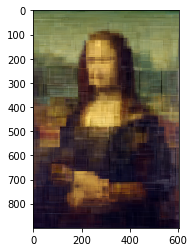

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor() 
rf.fit(train_coord,train_color)
coord_normed = [(x/900,y/604) for (x,y) in image_coord]
result = rf.predict(coord_normed).reshape(900,604,3)
plt.imshow(result)


In [52]:

def singletree(x):
    rf = RandomForestRegressor(n_estimators=1, max_depth=x) 
    rf.fit(train_coord,train_color)
    result = rf.predict(coord_normed).reshape(900,604,3)
    plt.imshow(result)
    plt.title('Depth of ' + str(x))
   

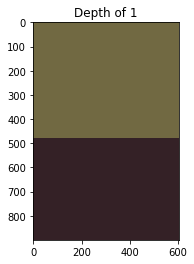

In [60]:
singletree(1)

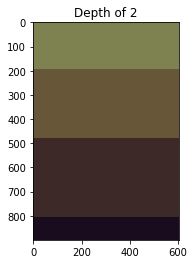

In [61]:
singletree(2)

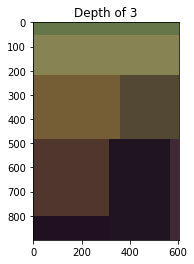

In [62]:
singletree(3)

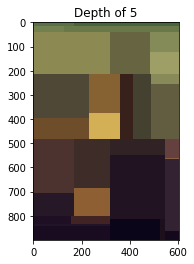

In [63]:
singletree(5)

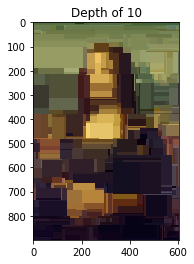

In [64]:
singletree(10)

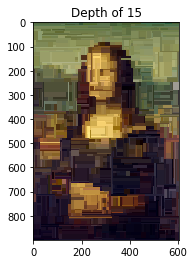

In [65]:
singletree(15)

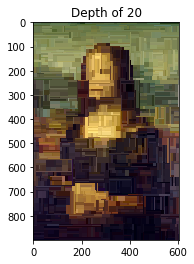

In [80]:
singletree(20)

In [66]:

def treeofdep7(x):
    rf = RandomForestRegressor(n_estimators = x,max_depth = 7) 
    rf.fit(train_coord,train_color)
    result = rf.predict(coord_normed).reshape(900,604,3) 
    plt.imshow(result)
    plt.title(str(x) +' Trees with depth of 7')


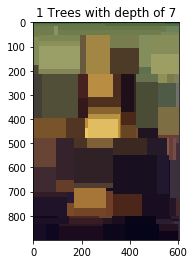

In [67]:
treeofdep7(1)

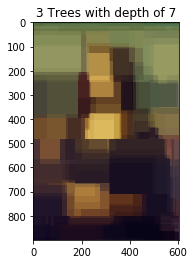

In [68]:
treeofdep7(3)

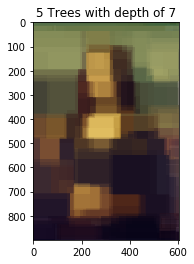

In [69]:
treeofdep7(5)

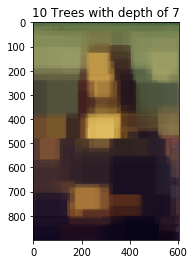

In [70]:
treeofdep7(10)

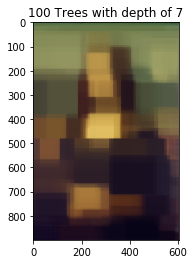

In [71]:
treeofdep7(100)

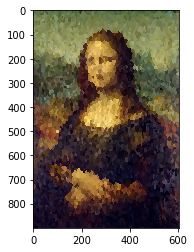

In [79]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=1)
model.fit(train_coord,train_color) 
prediction = model.predict(coord_normed).reshape(900,604,3) 
plt.imshow(prediction)

In [ ]:
#The following are our experiments with different pruning strategies

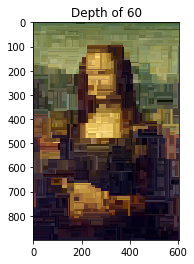

In [82]:
singletree(60)

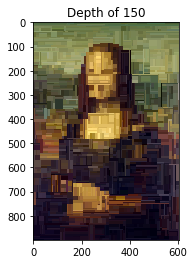

In [84]:
singletree(150)

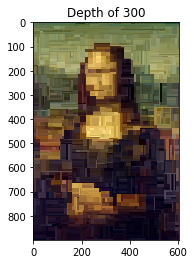

In [85]:
singletree(300)

In [93]:
def treeofdep15(x):
    rf = RandomForestRegressor(n_estimators = x,max_depth = 15) 
    rf.fit(train_coord,train_color)
    result = rf.predict(coord_normed).reshape(900,604,3) 
    plt.imshow(result)
    plt.title(str(x) +' Trees with depth of 15')

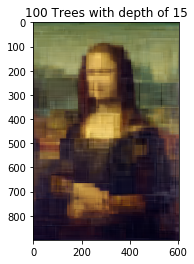

In [94]:
treeofdep15(100)

In [95]:
def treeofdep30(x):
    rf = RandomForestRegressor(n_estimators = x,max_depth = 30) 
    rf.fit(train_coord,train_color)
    result = rf.predict(coord_normed).reshape(900,604,3) 
    plt.imshow(result)
    plt.title(str(x) +' Trees with depth of 30')

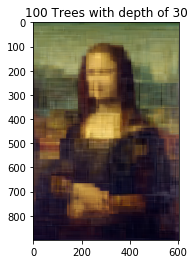

In [96]:
treeofdep30(100)